In [113]:
import numpy as np
import pandas as pd

from subprocess import check_output

# Checking the files present in current working directory
print(check_output(["ls", "-la", "../input"]).decode("utf-8"))


total 12
drwxr-xr-x 3 root   root    4096 Aug  9 05:42 .
drwxr-xr-x 5 root   root    4096 Aug  9 03:31 ..
drwxr-xr-x 2 nobody nogroup 4096 Jul 23 18:35 h-1b-visa



In [114]:
source_df = pd.read_csv("../input/h-1b-visa/h1b_kaggle.csv")

In [115]:
source_df.shape

(3002458, 11)

In [116]:
source_df.head(2)

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,"36,067.00","2,016.00","ANN ARBOR, MICHIGAN",-83.74,42.28
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,"242,674.00","2,016.00","PLANO, TEXAS",-96.70,33.02


In [117]:
source_df.drop(['Unnamed: 0'],inplace = True,axis = 1)

In [118]:
source_df.head(4)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,"36,067.00","2,016.00","ANN ARBOR, MICHIGAN",-83.74,42.28
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,"242,674.00","2,016.00","PLANO, TEXAS",-96.70,33.02
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,"193,066.00","2,016.00","JERSEY CITY, NEW JERSEY",-74.08,40.73
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,"220,314.00","2,016.00","DENVER, COLORADO",-104.99,39.74


In [119]:
source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   CASE_STATUS         object 
 1   EMPLOYER_NAME       object 
 2   SOC_NAME            object 
 3   JOB_TITLE           object 
 4   FULL_TIME_POSITION  object 
 5   PREVAILING_WAGE     float64
 6   YEAR                float64
 7   WORKSITE            object 
 8   lon                 float64
 9   lat                 float64
dtypes: float64(4), object(6)
memory usage: 229.1+ MB


In [120]:
source_df.isnull().any()

CASE_STATUS            True
EMPLOYER_NAME          True
SOC_NAME               True
JOB_TITLE              True
FULL_TIME_POSITION     True
PREVAILING_WAGE        True
YEAR                   True
WORKSITE              False
lon                    True
lat                    True
dtype: bool

In [121]:
source_df.isnull().sum().sort_values(ascending = False)

lat                   107242
lon                   107242
SOC_NAME               17734
PREVAILING_WAGE           85
EMPLOYER_NAME             59
JOB_TITLE                 43
FULL_TIME_POSITION        15
YEAR                      13
CASE_STATUS               13
WORKSITE                   0
dtype: int64

In [122]:
source_df['EMPLOYER_NAME'].value_counts()[:10]

INFOSYS LIMITED                                    130592
TATA CONSULTANCY SERVICES LIMITED                   64726
WIPRO LIMITED                                       48117
DELOITTE CONSULTING LLP                             36742
IBM INDIA PRIVATE LIMITED                           34219
ACCENTURE LLP                                       33447
MICROSOFT CORPORATION                               25576
HCL AMERICA, INC.                                   22678
ERNST & YOUNG U.S. LLP                              18232
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17528
Name: EMPLOYER_NAME, dtype: int64

In [123]:
import matplotlib.pyplot as plt
import seaborn as sb

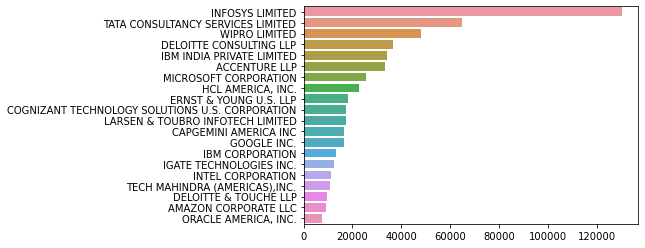

In [124]:
employer = source_df['EMPLOYER_NAME'].value_counts()[:20]
sb.barplot(x= employer.values, y= employer.index)
#OMG Desi companies outplayed tech gaints!!!

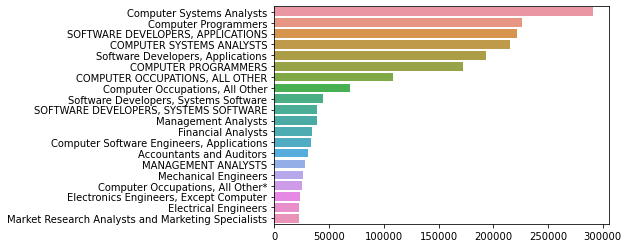

In [125]:
soc_name = source_df['SOC_NAME'].value_counts()[:20]
sb.barplot(x= soc_name.values, y= soc_name.index)

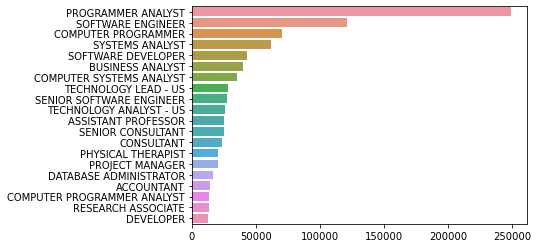

In [126]:
job_title = source_df['JOB_TITLE'].value_counts()[:20]
sb.barplot(x= job_title.values, y= job_title.index)
#Ofcourse, programming is the most favorite job.

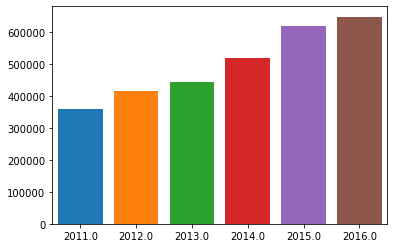

In [127]:
year = source_df["YEAR"].value_counts()[:10]
sb.barplot(x= year.index, y= year.values, saturation = 1)
#By every year no. of applications are increasing!

In [128]:
source_df["PREVAILING_WAGE"].sum()/source_df.shape[0]

146994.2703692694

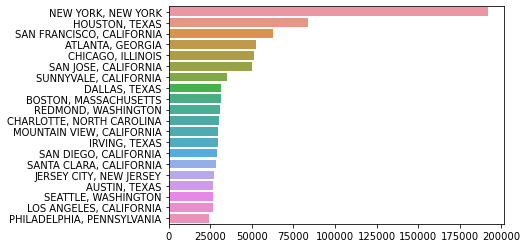

In [129]:
work_place = source_df["WORKSITE"].value_counts()[:20]
sb.barplot(x= work_place.values, y= work_place.index)
# More people are working in New York city.

In [130]:
pd.options.display.float_format = '{:,.2f}'.format
source_df.groupby('WORKSITE').agg({'PREVAILING_WAGE':'mean'}).sort_values(by = ['PREVAILING_WAGE'], ascending = False)[:10]


,PREVAILING_WAGE
WORKSITE,
"WASHINGTON, NA","657,900,000.00"
"SOMERSET, NEW YORK","126,330,880.00"
"PEKIN, ILLINOIS","90,951,343.34"
"CITY, CALIFORNIA","72,800,000.00"
"MOUNTAIN VIEW, ILLINOIS","70,088,969.33"
"W READING, PENNSYLVANIA","66,777,374.00"
"CLAVERACK, NEW YORK","53,803,214.50"
"CENTREVILLE, DISTRICT OF COLUMBIA","53,262,154.50"
"BURLINGTON, COLORADO","50,156,298.60"


In [131]:
source_df[source_df['WORKSITE'] == 'WASHINGTON, NA']

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
2775906,DENIED,COMMONHEALTH ACTION,Medical and Health Services Managers,PROGRAM MANAGER (POSITIVE PATHWAYS),Y,"657,900,000.00","2,011.00","WASHINGTON, NA",nan,nan


In [132]:
#status = source_df['CASE_STATUS'].value_counts()
#sb.barplot(x = status.values, y = status.index)
source_df['CASE_STATUS'].value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

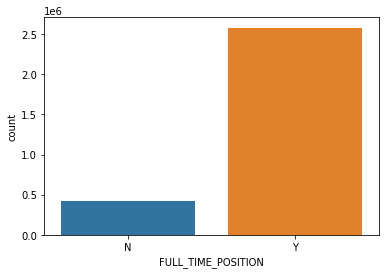

In [133]:
sb.countplot(source_df['FULL_TIME_POSITION'])

In [134]:
sample = source_df[(source_df['EMPLOYER_NAME'] == 'INFOSYS LIMITED') | (source_df['EMPLOYER_NAME'] == 'TATA CONSULTANCY SERVICES LIMITED') | (source_df['EMPLOYER_NAME'] == 'WIPRO LIMITED')]

sample.groupby(["EMPLOYER_NAME", "YEAR"]).count()['CASE_STATUS']

EMPLOYER_NAME                      YEAR    
INFOSYS LIMITED                    2,011.00      195
                                   2,012.00    15818
                                   2,013.00    32223
                                   2,014.00    23759
                                   2,015.00    33245
                                   2,016.00    25352
TATA CONSULTANCY SERVICES LIMITED  2,011.00     5416
                                   2,012.00     6735
                                   2,013.00     8790
                                   2,014.00    14098
                                   2,015.00    16553
                                   2,016.00    13134
WIPRO LIMITED                      2,011.00     3028
                                   2,012.00     7182
                                   2,013.00     6734
                                   2,014.00     8365
                                   2,015.00    12201
                                   2,016.00    10607
Na

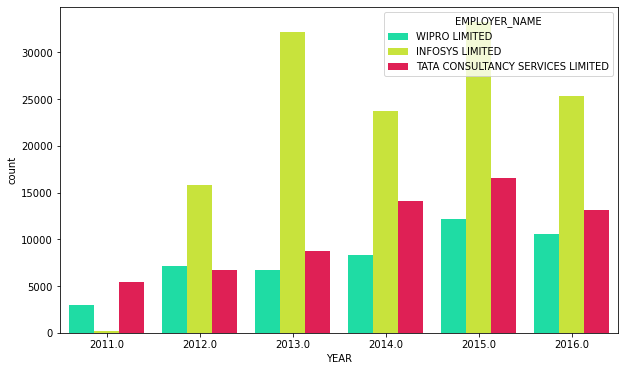

In [135]:
fig, ax = plt.subplots(figsize = (10,6))

sb.countplot(palette = 'gist_ncar',x= 'YEAR',hue = 'EMPLOYER_NAME',data = sample)

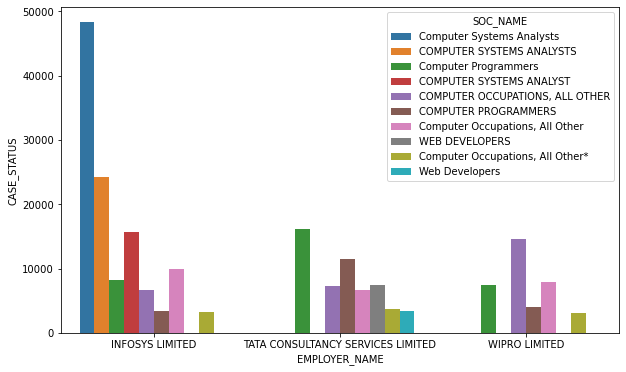

In [136]:
fig, ax = plt.subplots(figsize = (10,6))
sb.barplot(x= 'EMPLOYER_NAME',hue = 'SOC_NAME',y = 'CASE_STATUS', data = sample.groupby(['SOC_NAME','EMPLOYER_NAME']).count()['CASE_STATUS'].sort_values(ascending = False)[:20].reset_index())